# Implementing LSA using Gensim


In [1]:
#import modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt


C:\Users\divesh.kubal\AppData\Local\Programs\Python\Python36\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# Loading Data
Download the data from: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Latent+Semantic+Analysis+in+Python/articles+4.txt

In [2]:
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r", encoding='latin1') as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles

In [3]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

# Prepare Corpus
Next step is to prepare corpus. Here, you need to create a document-term matrix and dictionary of terms.

In [4]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

# Create an LSA model using Gensim

In [5]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

# Determine the number of topics
Another extra step needs to be taken to optimize results by identifying an optimum amount of topics. Here, you will generate coherence scores to determine an optimum number of topics.

In [6]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

Let's plot coherence score values.

In [7]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

Total Number of Documents: 4551


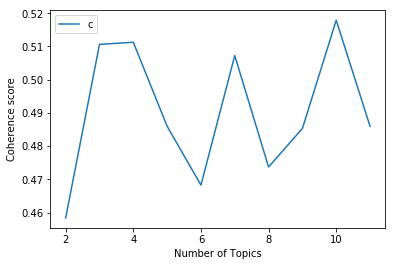

[(0, '0.868*"â" + 0.156*"trump" + 0.136*"say" + 0.118*"said" + 0.075*"would" + 0.073*"peopl" + 0.071*"one" + 0.070*"clinton" + 0.065*"itâ" + 0.059*"year"'), (1, '-0.389*"citi" + -0.372*"v" + -0.358*"2016" + -0.358*"h" + -0.356*"2017" + -0.166*"unit" + -0.160*"west" + -0.157*"manchest" + -0.116*"apr" + -0.112*"dec"'), (2, '-0.330*"eu" + 0.314*"trump" + -0.243*"say" + 0.220*"â" + -0.215*"would" + -0.173*"leav" + -0.147*"uk" + 0.138*"clinton" + -0.133*"said" + -0.133*"brexit"'), (3, '0.460*"trump" + -0.268*"min" + -0.206*"â" + 0.205*"clinton" + 0.180*"said" + 0.175*"campaign" + 0.172*"eu" + 0.139*"vote" + 0.132*"say" + -0.121*"goal"'), (4, '0.397*"min" + 0.374*"trump" + -0.281*"â" + 0.176*"clinton" + 0.175*"goal" + 0.146*"ball" + 0.122*"1" + 0.116*"0" + 0.102*"leagu" + 0.102*"win"'), (5, '-0.434*"bank" + 0.262*"eu" + 0.240*"say" + 0.186*"min" + -0.183*"market" + -0.175*"year" + -0.165*"rate" + 0.143*"leav" + -0.128*"financi" + 0.123*"cameron"'), (6, '0.614*"say" + -0.223*"eu" + -0.178*"sa

In [8]:
# LSA Model
number_of_topics=7
words=10
document_list,titles=load_data("",r"articles+4.txt")
clean_text=preprocess_data(document_list)

start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)

model=create_gensim_lsa_model(clean_text,number_of_topics,words)

In [9]:
print (model)

LsiModel(num_terms=61124, num_topics=7, decay=1.0, chunksize=20000)


Topic-1: "trump", "say", "said", "would", "clinton", "peopl", "one", "campaign","year","time"' (US Presidential Elections)
Topic-2: "citi", "v", "h", "2016", "2017","unit", "west", "manchest","apr" ,"dec"'(English Premier League)
Topic-3: "trump","clinton", "eu","say","would","donald","leav","uk" ,"republican" ,"cameron"(US Presidential Elections, Brexit)
Topic-4:min","eu","goal","ball","play","said","say","leagu","leav","game"(English Premier League)
Topic-5: "bank","eu","min","year","leav","cameron","market","rate","vote","say" (Brexit and Market Condition)
Topic-6: "bank","say","peopl","trump","1" ,"min" ,"eu","market" ,"like"(Plitical situations and market conditions)
Topic-7: "say","min","vote","govern","poll","tax","statement","bank","budget","one"(US Presidential Elections and Financial Planning)


# Use-Cases of Topic Modeling
Simple applications in which this technique is used are documented clustering in text analysis, recommender systems, and information retrieval. More detailed use-cases of topic modeling are:

Resume Summarization: It can help recruiters to evaluate resumes by a quick glance. They can reduce effort in filtering pile of resume.
Search Engine Optimization: online articles, blogs, and documents can be tag easily by identifying the topics and associated keywords, which can improve optimize search results.
Recommender System Optimization: recommender systems act as an information filter and advisor according to the user profile and previous history. It can help us to discover unvisited relevant content based on past visits.
Improving Customer Support: Discovering relevant topics and associated keywords in customer complaints and feedback for examples product and service specifications, department, and branch details. Such information help company to directly rotated the complaint in respective department.
In the healthcare industry, topic modeling can help us to extract useful and valuable information from unstructured medical reports. This information can be used for patients treatment and medical science research purpose.